# Step 1: Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 2: Load the dataset

In [3]:
dataset = pd.read_csv("housing.csv")

# Step 3: Data Exploration and Preprocessing

In [4]:
# Display the first few rows of the dataset
dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
# Check for missing values
missing_values = dataset.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [6]:
# Handle missing values (if necessary)
# For example, to remove rows with missing values:
dataset.dropna(inplace=True)

In [7]:
# Convert categorical variables to numeric using one-hot encoding
dataset = pd.get_dummies(dataset, columns=['mainroad', 'guestroom', 'basement', 'hotwaterheating', 
                                           'airconditioning', 'prefarea', 'furnishingstatus'], drop_first=True)


In [8]:
dataset.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,True,False,False,False,True,True,False,False
1,12250000,8960,4,4,4,3,True,False,False,False,True,False,False,False
2,12250000,9960,3,2,2,2,True,False,True,False,False,True,True,False
3,12215000,7500,4,2,2,3,True,False,True,False,True,True,False,False
4,11410000,7420,4,1,2,2,True,True,True,False,True,False,False,False


# Step 4: Define the target and input features

In [9]:
X = dataset[['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'mainroad_yes', 'guestroom_yes', 
             'basement_yes', 'hotwaterheating_yes', 'airconditioning_yes', 'prefarea_yes', 
             'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished']]
y = dataset['price']

# Step 5: Data Splitting

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Step 6: Linear Regression Modeling

In [11]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Step 7: Model Evaluation

In [12]:
# Make predictions on the testing data
y_pred = model.predict(X_test)

In [13]:
# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 1754318687330.66
R-squared: 0.65


# Step 8: Visualization

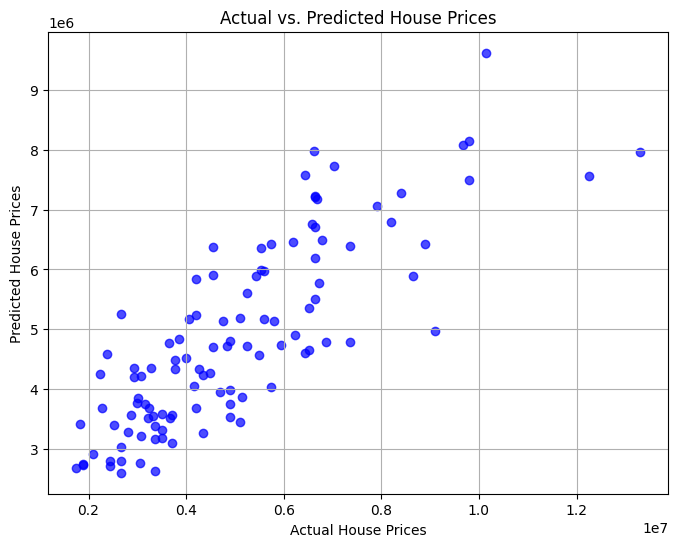

In [14]:
# Step 8: Visualization
# Visualize the actual vs. predicted house prices using a scatterplot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.title('Actual vs. Predicted House Prices')
plt.grid(True)
plt.show()

# Step 9: Interpretation

In [15]:
# Print the coefficients (slopes) for each feature to understand their impact on the house price
coefficients = model.coef_
intercept = model.intercept_

print("Coefficients (Slopes):")
for feature, coef in zip(X.columns, coefficients):
    print(f"{feature}: {coef:.2f}")

print(f"Intercept: {intercept:.2f}")

Coefficients (Slopes):
area: 235.97
bedrooms: 76778.70
bathrooms: 1094444.79
stories: 407476.59
parking: 224841.91
mainroad_yes: 367919.95
guestroom_yes: 231610.04
basement_yes: 390251.18
hotwaterheating_yes: 684649.89
airconditioning_yes: 791426.74
prefarea_yes: 629890.57
furnishingstatus_semi-furnished: -126881.82
furnishingstatus_unfurnished: -413645.06
Intercept: 260032.36


In [16]:
y_test[0], y_pred[0]

(13300000, 5164653.900339672)